<a href="https://colab.research.google.com/github/bimal-bp/LaptopPrice_prediction_MODEL/blob/ML_MODELS/Laptop_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/laptop_data.csv')


In [2]:
df.head(3)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000


In [3]:
df.shape

(1303, 12)

In [4]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [7]:
df = df.drop('Unnamed: 0',axis=1)

In [8]:
df['Ram']=df['Ram'].astype(str).str.replace('GB','')
df['Weight']=df['Weight'].astype(str).str.replace('Kg','')

In [9]:
df['Ram']=df['Ram'].astype(str).astype(int)


In [10]:
# Assuming 'Weight' column contains values like '1.37kg'
df['Weight'] = df['Weight'].str.replace('kg', '').astype(float).astype(int)


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int64  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   int64  
 10  Price             1303 non-null   float64
dtypes: float64(2), int64(2), object(7)
memory usage: 112.1+ KB


<ipython-input-12-b020f02619da>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<Axes: xlabel='Price', ylabel='Density'>

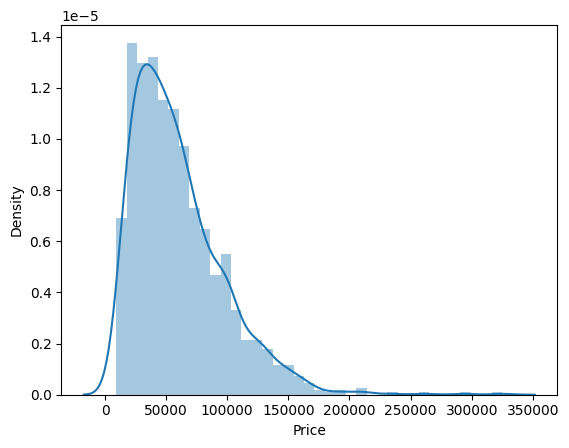

In [12]:
import seaborn as sns
sns.distplot(df['Price'])


<Axes: >

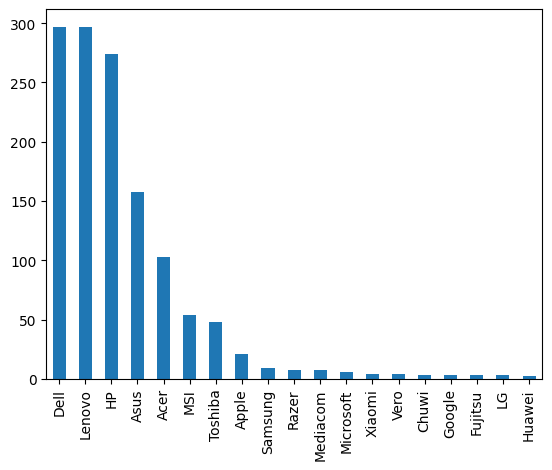

In [13]:
df['Company'].value_counts().plot(kind='bar')

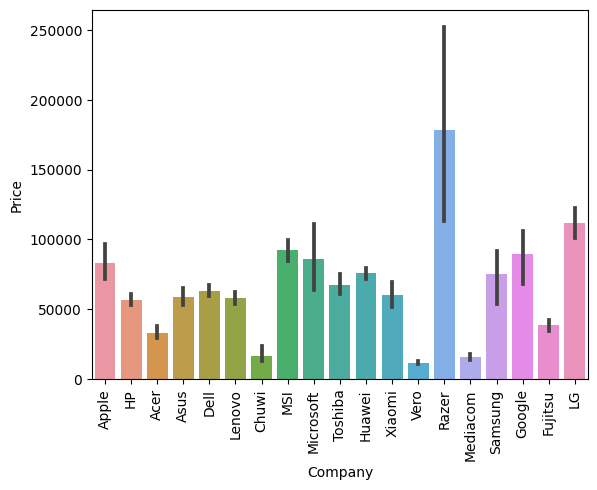

In [14]:
import matplotlib.pyplot  as plt
import seaborn as sns
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [15]:
df['TypeName'].value_counts()

Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: TypeName, dtype: int64

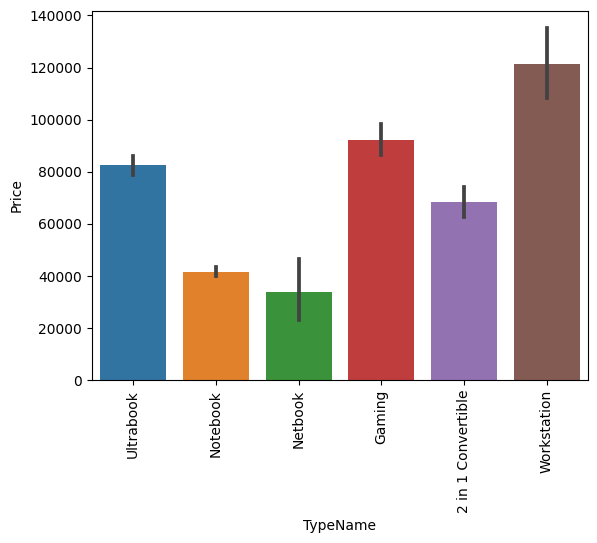

In [16]:
sns.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<ipython-input-17-51888cb550e6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Inches'])


<Axes: xlabel='Inches', ylabel='Density'>

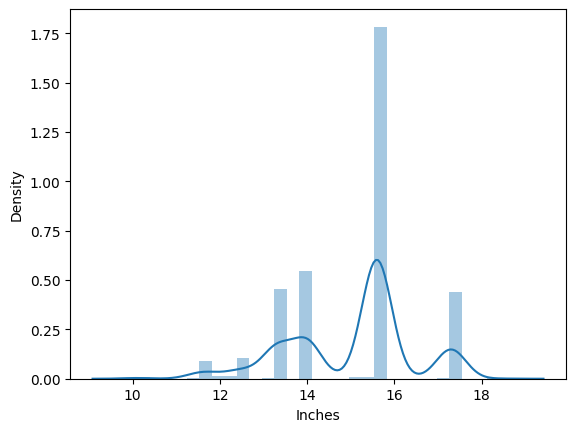

In [17]:
sns.distplot(df['Inches'])

<Axes: xlabel='Inches', ylabel='Price'>

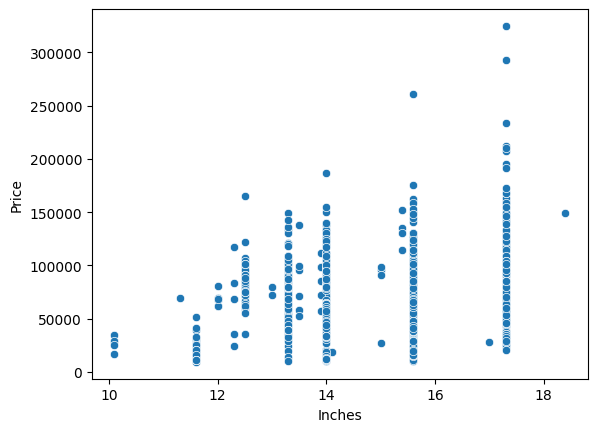

In [18]:
sns.scatterplot(x=df['Inches'],y=df['Price'])

In [19]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [20]:
df['Touchscreen']=df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [21]:
df['Touchscreen'].value_counts()

0    1111
1     192
Name: Touchscreen, dtype: int64

<Axes: xlabel='Touchscreen', ylabel='Price'>

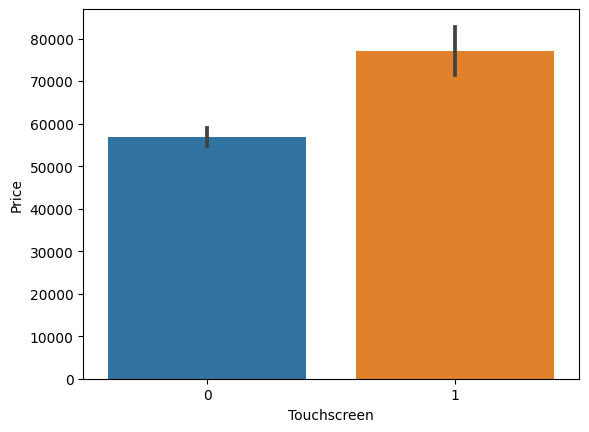

In [22]:
sns.barplot(x=df['Touchscreen'],y=df['Price'])

In [23]:
df['Ips'] = df['ScreenResolution'].apply(lambda x: 1 if 'IPS' in x else 0)


In [24]:
df['Ips'].value_counts()

0    938
1    365
Name: Ips, dtype: int64

<Axes: xlabel='Ips', ylabel='Price'>

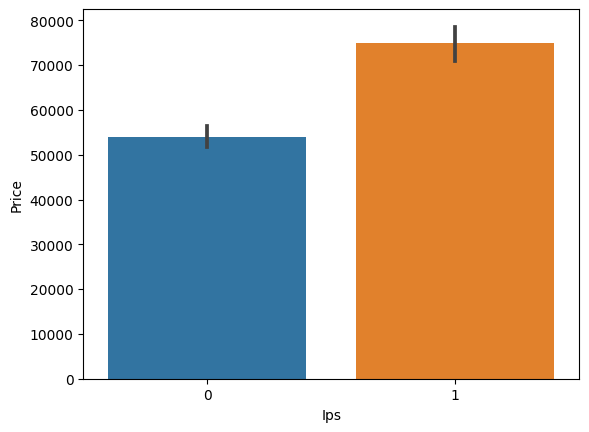

In [25]:
sns.barplot(x=df['Ips'],y=df['Price'])

In [26]:
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1,47895.5232,0,0


In [27]:
new=df['ScreenResolution'].str.split('x',n=1,expand=True)

In [28]:
df['x_res']=new[0]
df['y_res']=new[1]

In [29]:
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,x_res,y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1,47895.5232,0,0,1440,900


In [30]:
df['x_res'] = df['x_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [31]:
df['x_res']=df['x_res'].astype('int')
df['y_res']=df['y_res'].astype('int')
df['Touchscreen']=df['Touchscreen'].astype(int)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int64  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   int64  
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  x_res             1303 non-null   int64  
 14  y_res             1303 non-null   int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 152.8+ KB


In [33]:
df.corr()['Price']

<ipython-input-33-9447c1bc3d29>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price']


Inches         0.068197
Ram            0.743007
Weight         0.173722
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
x_res          0.556529
y_res          0.552809
Name: Price, dtype: float64

In [34]:

df['ppi']=(((df['x_res']**2)+(df['y_res']**2))**0.5/df['Inches']).astype('float')

In [35]:
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,x_res,y_res,ppi
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1,47895.5232,0,0,1440,900,127.677940


In [36]:
df.corr()['Price']

<ipython-input-36-9447c1bc3d29>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price']


Inches         0.068197
Ram            0.743007
Weight         0.173722
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
x_res          0.556529
y_res          0.552809
ppi            0.473487
Name: Price, dtype: float64

In [37]:
df.drop(columns=['ScreenResolution'],inplace=True)

In [38]:
df.drop(columns=['Inches','x_res','y_res'],inplace=True)

In [39]:
df.head(3)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1,30636.0000,0,0,141.211998


In [40]:
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [41]:
df['cpu name']=df['Cpu'].apply(lambda x: " ".join(x.split()[0:3]))

In [42]:
df.head(3)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,cpu name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1,30636.0000,0,0,141.211998,Intel Core i5


In [43]:
def fetch_processor(text):
  if text == 'Intel Core i7' or text == 'Intel Core i5' or text =='Intel Core i3':
    return text
  else:
    if text.split()[0]=='Intel':
      return 'Other Intel Processor'
    else:
      return 'AMD processor'

In [44]:
df['cpu brand']=df['cpu name'].apply(fetch_processor)

In [45]:
df.sample(3)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,cpu name,cpu brand
677,HP,2 in 1 Convertible,Intel Celeron Dual Core N3350 1.1GHz,8,64GB Flash Storage,Intel HD Graphics 500,Chrome OS,1,26373.600,1,0,135.094211,Intel Celeron Dual,Other Intel Processor
270,Apple,Ultrabook,Intel Core i5 2.9GHz,8,512GB SSD,Intel Iris Graphics 550,macOS,1,104370.192,0,1,226.983005,Intel Core i5,Intel Core i5
26,Apple,Ultrabook,Intel Core i5 1.6GHz,8,128GB Flash Storage,Intel HD Graphics 6000,Mac OS X,1,58554.720,0,0,127.677940,Intel Core i5,Intel Core i5


<Axes: >

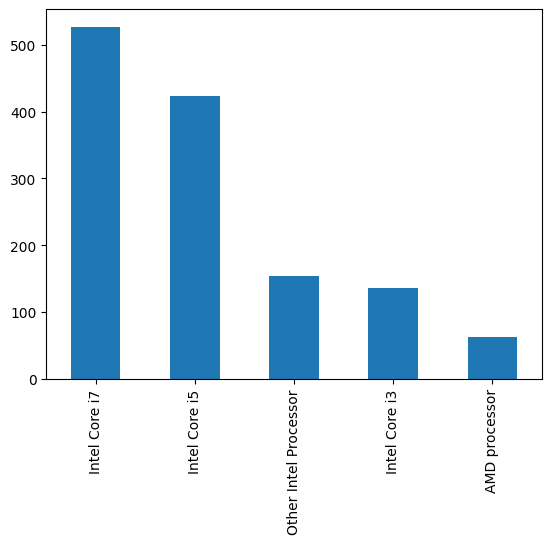

In [46]:
df['cpu brand'].value_counts().plot(kind='bar')

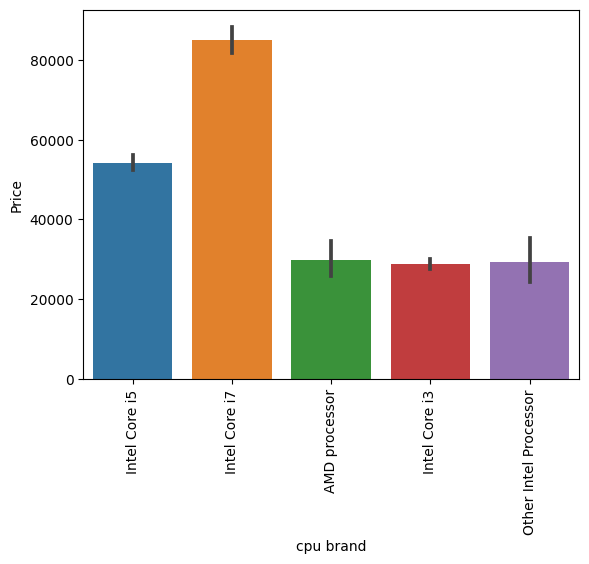

In [47]:
sns.barplot(x=df['cpu brand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [48]:
df.drop(columns=['Cpu','cpu name'],inplace=True)

In [49]:
df.sample(3)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,cpu brand
149,Acer,Notebook,4,1TB HDD,Intel HD Graphics 520,Windows 10,2,23816.16,0,0,100.454670,Intel Core i3
1264,Dell,Notebook,2,500GB HDD,Intel HD Graphics,Windows 10,2,20193.12,0,0,100.454670,Other Intel Processor
602,Acer,Notebook,4,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1,17529.12,0,0,157.350512,Other Intel Processor


In [50]:
df['Ram'].value_counts()

8     619
4     375
16    200
6      41
12     25
2      22
32     17
24      3
64      1
Name: Ram, dtype: int64

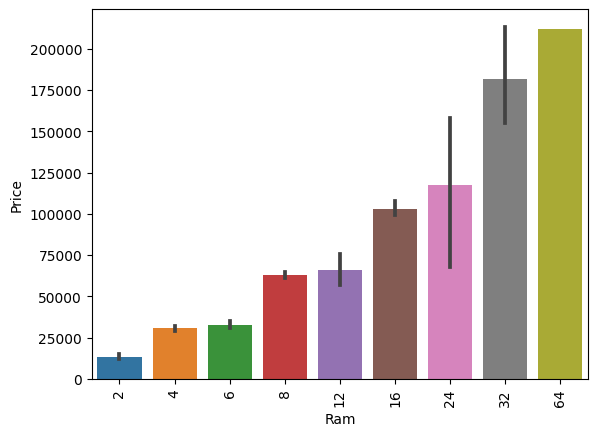

In [51]:
sns.barplot(x=df['Ram'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [52]:
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [53]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n = 1, expand = True)

df["first"]= new[0]
df["first"]=df["first"].str.strip()

df["second"]= new[1]

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['first'] = df['first'].str.replace(r'\D', '')

df["second"].fillna("0", inplace = True)

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)
df['second']=df['second'].str.replace(r'\D','')

df['first']=df['first'].astype(int)
df['second']=df['second'].astype(int)

df['HDD']=(df['first']*df['Layer1HDD']+df['second']*df['Layer2HDD'])
df['SSD']=(df['first']*df['Layer1SSD']+df['second']*df['Layer2SSD'])
df['Hybrid']=(df['first']*df['Layer1Hybrid']+df['second']*df['Layer2Hybrid'])
df['Flash_Storage']=(df['first']*df['Layer1Flash_Storage']+df['second']*df['Layer2Flash_Storage'])

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)


<ipython-input-53-3abbb39ae394>:16: FutureWarning: The default value of regex will change from True to False in a future version.
  df['first'] = df['first'].str.replace(r'\D', '')
<ipython-input-53-3abbb39ae394>:24: FutureWarning: The default value of regex will change from True to False in a future version.
  df['second']=df['second'].str.replace(r'\D','')


In [54]:
df.drop(columns=['Memory'],inplace=True)

In [55]:
df.sample(3)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,cpu brand,HDD,SSD,Hybrid,Flash_Storage
349,Dell,Ultrabook,8,AMD Radeon 530,Windows 10,1,35324.6400,0,0,141.211998,Intel Core i5,1000,0,0,0
460,Acer,Notebook,4,Nvidia GeForce 940MX,Windows 10,2,28984.3200,0,0,141.211998,Intel Core i3,1000,0,0,0
876,Asus,Notebook,4,Intel HD Graphics 505,Linux,2,21258.1872,0,0,100.454670,Other Intel Processor,1000,0,0,0


In [56]:
df.corr()['Price']

<ipython-input-56-9447c1bc3d29>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price']


Ram              0.743007
Weight           0.173722
Price            1.000000
Touchscreen      0.191226
Ips              0.252208
ppi              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64

In [57]:
df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)

In [58]:
df['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [59]:
df['Gpubrand']=df['Gpu'].apply(lambda x:x.split()[0])

In [60]:
df.head(3)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,cpu brand,HDD,SSD,Gpubrand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel


In [61]:
df['Gpubrand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpubrand, dtype: int64

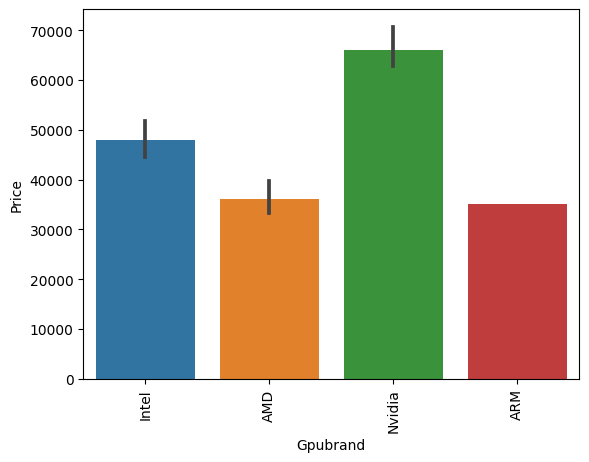

In [62]:
import numpy as np
sns.barplot(x=df['Gpubrand'],y=df['Price'],estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

In [63]:
df.drop(columns='Gpu',inplace=True)

In [64]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

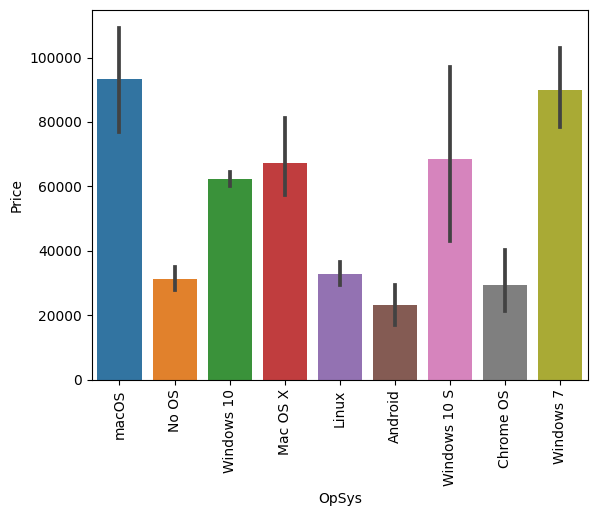

In [65]:
sns.barplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [66]:
def cat_os(inp):
  if inp == 'Windows 10'or inp == 'Windows 7' or inp == 'Windows 10 S':
    return 'windows'
  elif inp== 'macOS'or inp =='Mac OS/Linux':
    return 'mac'
  else:
    return 'Other s /No Os/Linux'


In [67]:
df['os']=df['OpSys'].apply(cat_os)

In [68]:
df.head(2)

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,cpu brand,HDD,SSD,Gpubrand,os
0,Apple,Ultrabook,8,macOS,1,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,mac
1,Apple,Ultrabook,8,macOS,1,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,mac


In [69]:
df.drop(columns=['OpSys'],inplace=True)

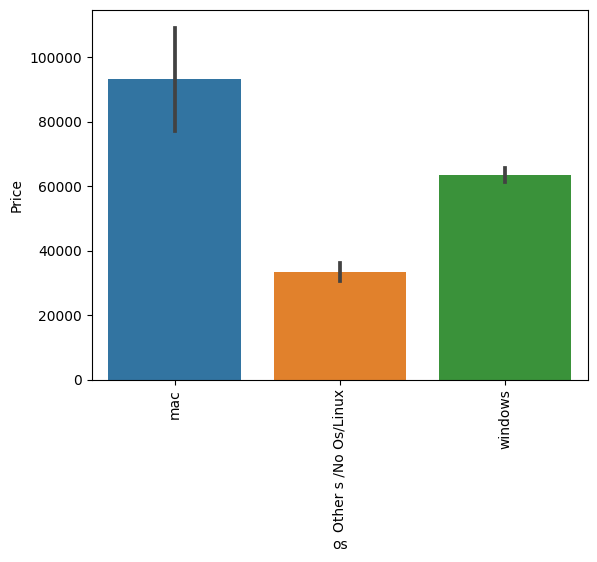

In [70]:
sns.barplot(x=df['os'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<ipython-input-71-05ee4c8848be>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

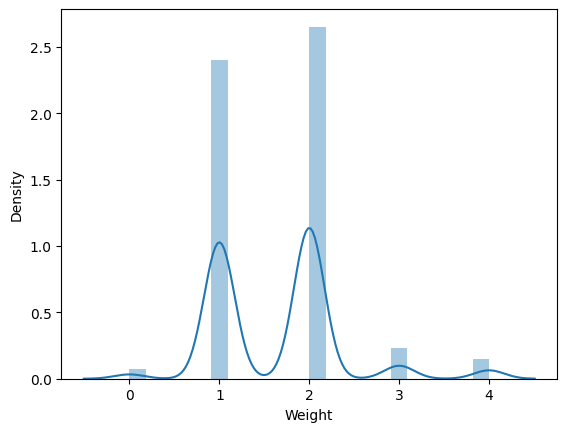

In [71]:
sns.distplot(df['Weight'])

<Axes: xlabel='Weight', ylabel='Price'>

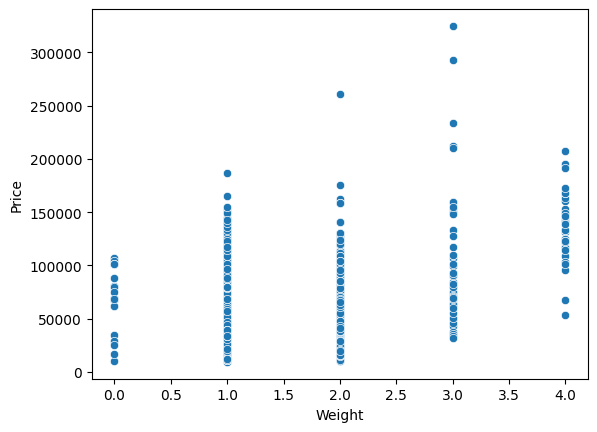

In [72]:
sns.scatterplot(x=df['Weight'],y=df['Price'])

In [73]:
df.corr()['Price']

<ipython-input-73-9447c1bc3d29>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price']


Ram            0.743007
Weight         0.173722
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
ppi            0.473487
HDD           -0.096441
SSD            0.670799
Name: Price, dtype: float64

<ipython-input-74-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

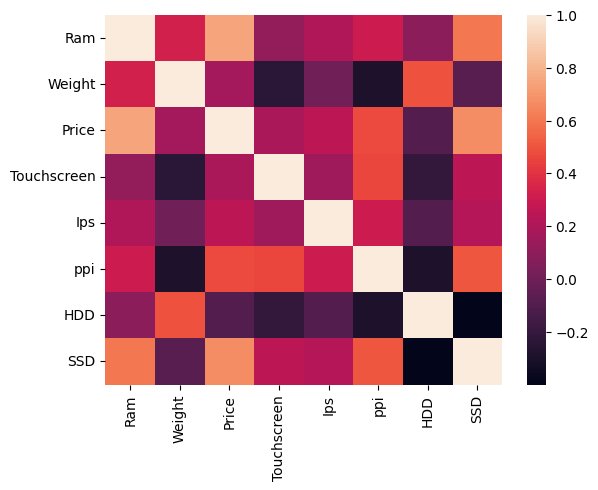

In [74]:
sns.heatmap(df.corr())

<ipython-input-75-c1a82a4801f0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['Price']))


<Axes: xlabel='Price', ylabel='Density'>

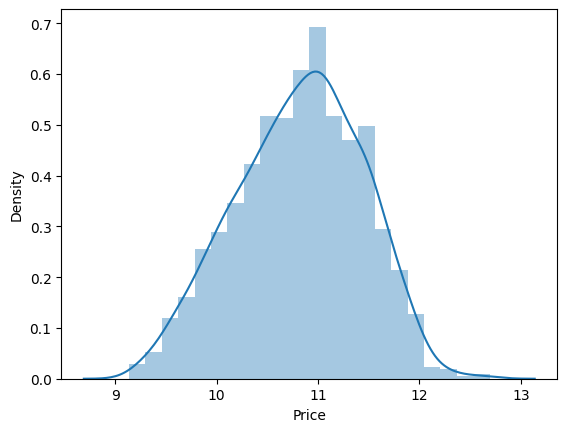

In [75]:
sns.distplot(np.log(df['Price']))

MODELING

In [76]:
x=df.drop(columns=['Price'])
y=np.log(df['Price'])

In [77]:
x.shape

(1303, 12)

In [78]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=2)

In [79]:
xtrain.shape

(1042, 12)

In [80]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [85]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

LINEAR REGRESSION

In [89]:
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')
step2=LinearRegression()
pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)

])
pipe.fit(xtrain,ytrain)
ypred=pipe.predict(xtest)

print('R2score',r2_score(ytest,ypred))
print('MAE',mean_absolute_error(ytest,ypred))

R2score 0.8228197458113414
MAE 0.20396963339379925


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [98]:
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')
step2=Ridge(alpha=10)
pipe=Pipeline([
    ('step1',step1),
   ('step2',step2)
])
pipe.fit(xtrain,ytrain)
ypred=pipe.predict(xtest)
print('R2score',r2_score(ytest,ypred))
print('MAE',mean_absolute_error(ytest,ypred))

R2score 0.8250767546248446
MAE 0.20162964452103949


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [96]:
step1=ColumnTransformer(transformers=[
    ('col_trf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')
step2=Lasso(alpha=0.0001)
pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])
pipe.fit(xtrain,ytrain)
ypred=pipe.predict(xtest)
print('R2score',r2_score(ytest,ypred))
print('MAE',mean_absolute_error(ytest,ypred))

R2score 0.8243187088715984
MAE 0.20304752792637998


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


KNN

In [99]:
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')
step2=KNeighborsRegressor(n_neighbors=3)
pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])
pipe.fit(xtrain,ytrain)
ypred=pipe.predict(xtest)
print("R2score",r2_score(ytest,ypred))
print("MAE",mean_absolute_error(ytest,ypred))

R2score 0.8078622659636634
MAE 0.1970870646249021


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [100]:
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')
step2=DecisionTreeRegressor(max_depth=8)
pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])
pipe.fit(xtrain,ytrain)
ypred=pipe.predict(xtest)
print("R2score",r2_score(ytest,ypred))
print("MAE",mean_absolute_error(ytest,ypred))

R2score 0.8307491756639087
MAE 0.18891042333508304


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [102]:
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')
step2=SVR(kernel='rbf',C=10000,epsilon=0.1)
pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])
pipe.fit(xtrain,ytrain)
ypred=pipe.predict(xtest)
print("R2score",r2_score(ytest,ypred))
print("MAE",mean_absolute_error(ytest,ypred))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2score 0.8416768840622456
MAE 0.19139766810494147


In [ ]:
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')
step2=KNeighborsRegressor(n_neighbors=3)
pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])
pipe.fit(xtrain,ytrain)
ypred=pipe.predict(xtest)
print("R2score",r2_score(ytest,ypred))
print("MAE",mean_absolute_error(ytest,ypred))

In [104]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(xtrain,ytrain)

ypred = pipe.predict(xtest)

print('R2 score',r2_score(ytest,ypred))
print('MAE',mean_absolute_error(ytest,ypred))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score 0.8768811879512641
MAE 0.16490275022094528


In [112]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = AdaBoostRegressor(n_estimators=15,learning_rate=1.0)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(xtrain,ytrain)

ypred = pipe.predict(xtest)

print('R2 score',r2_score(ytest,ypred))
print('MAE',mean_absolute_error(ytest,ypred))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score 0.8052428737361783
MAE 0.21415021258683156


In [114]:

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(xtrain,ytrain)

ypred = pipe.predict(xtest)

print('R2 score',r2_score(ytest,ypred))
print('MAE',mean_absolute_error(ytest,ypred))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score 0.8794064088831546
MAE 0.16262411390744405


In [115]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(xtrain,ytrain)

ypred = pipe.predict(xtest)

print('R2 score',r2_score(ytest,ypred))
print('MAE',mean_absolute_error(ytest,ypred))

R2 score 0.8846784020863595
MAE 0.15534597128534036


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [117]:
bootstrap = True
max_sample = 100  # You can set your desired value for max_sample


In [124]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')


estimators = [
    ('rf', RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)),
    ('gbdt',GradientBoostingRegressor(n_estimators=100,max_features=0.5)),
    ('xgb', XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5))
]

step2 = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=100))

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(xtrain,ytrain)

ypred = pipe.predict(xtest)

print('R2 score',r2_score(ytest,ypred))
print('MAE',mean_absolute_error(ytest,ypred))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score 0.8621912050081098
MAE 0.17155665936731623


In [126]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

In [127]:
df

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,cpu brand,HDD,SSD,Gpubrand,os
0,Apple,Ultrabook,8,1,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,mac
1,Apple,Ultrabook,8,1,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,mac
2,HP,Notebook,8,1,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Other s /No Os/Linux
3,Apple,Ultrabook,16,1,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,mac
4,Apple,Ultrabook,8,1,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1,33992.6400,1,1,157.350512,Intel Core i7,0,128,Intel,windows
1299,Lenovo,2 in 1 Convertible,16,1,79866.7200,1,1,276.053530,Intel Core i7,0,512,Intel,windows
1300,Lenovo,Notebook,2,1,12201.1200,0,0,111.935204,Other Intel Processor,0,0,Intel,windows
1301,HP,Notebook,6,2,40705.9200,0,0,100.454670,Intel Core i7,1000,0,AMD,windows
